In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/sarahboller/Desktop/CF Achievement 6/02 Data/data for supervised machine learning.csv')

In [5]:
df.shape

(201992, 12)

In [6]:
df.head()

,host_since,days Passed,accommodates,bathrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_value,listing_city,Population,City Code
0,3/26/14,3645,12,2.5,6,5000,129,4.91,4.84,"Austin, TX",974447,3
1,9/28/14,3459,6,1.0,3,5000,6,4.67,4.67,"Austin, TX",974447,3
2,2/26/17,2577,14,2.5,3,5000,111,4.78,4.86,"Austin, TX",974447,3
3,10/22/13,3800,10,3.0,4,5000,5,5.00,5.00,"Austin, TX",974447,3
4,3/25/18,2185,16,7.0,7,5000,1,5.00,5.00,"Austin, TX",974447,3


In [9]:
df = df.drop(columns = ['host_since', 'listing_city',])

In [19]:
# Elbow Technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/sarahboller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-9.482779385097024e+17,
 -2.5920213989782634e+17,
 -5.785685764563741e+16,
 -1.986751545285595e+16,
 -8137404532678446.0,
 -4576212840515993.0,
 -2117760269605062.8,
 -1156712529913808.5,
 -670088999803032.5]

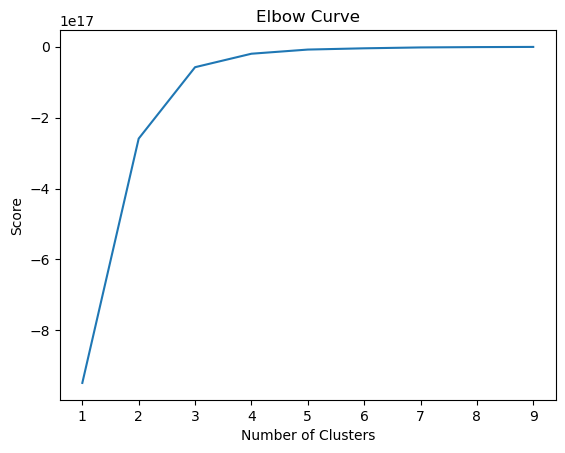

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [22]:
# The curve straightens out after 4. So the number of clusters is 4.

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/sarahboller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [25]:
df['clusters'] = kmeans.fit_predict(df)

/Users/sarahboller/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
df.head()

,days Passed,accommodates,bathrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_value,Population,City Code,clusters
0,3645,12,2.5,6,5000,129,4.91,4.84,974447,3,3
1,3459,6,1.0,3,5000,6,4.67,4.67,974447,3,3
2,2577,14,2.5,3,5000,111,4.78,4.86,974447,3,3
3,3800,10,3.0,4,5000,5,5.00,5.00,974447,3,3
4,2185,16,7.0,7,5000,1,5.00,5.00,974447,3,3


In [27]:
df['clusters'].value_counts()

clusters
0    75202
3    72851
2    36578
1    17361
Name: count, dtype: int64

/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


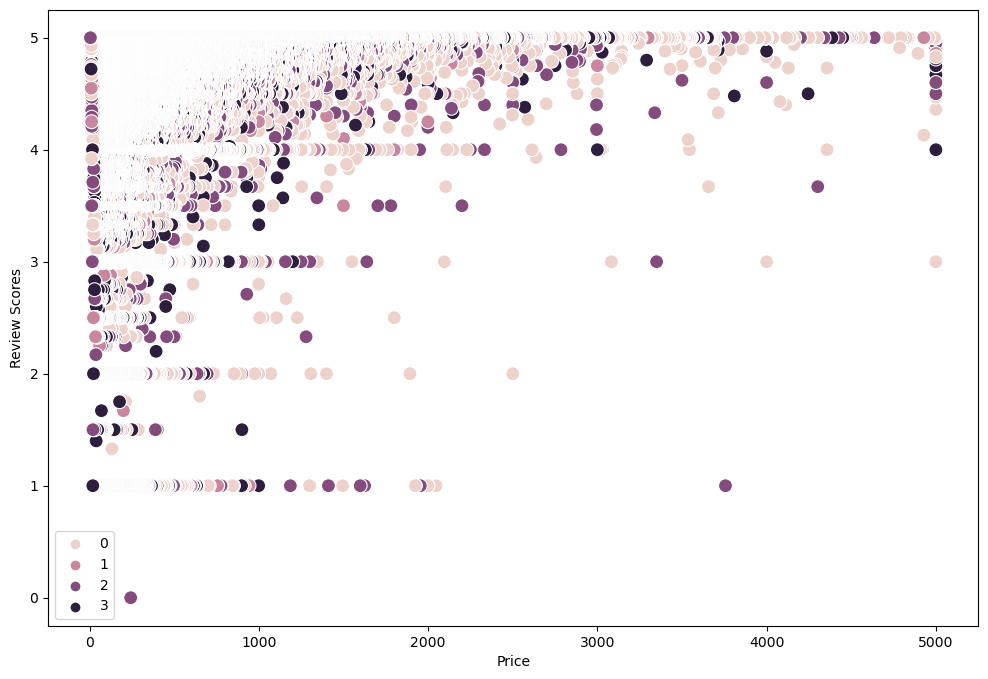

In [29]:
# Plot the clusters for the "Review Scores" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['price'], y=df['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Review Scores') # Label y-axis.
plt.show()

/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


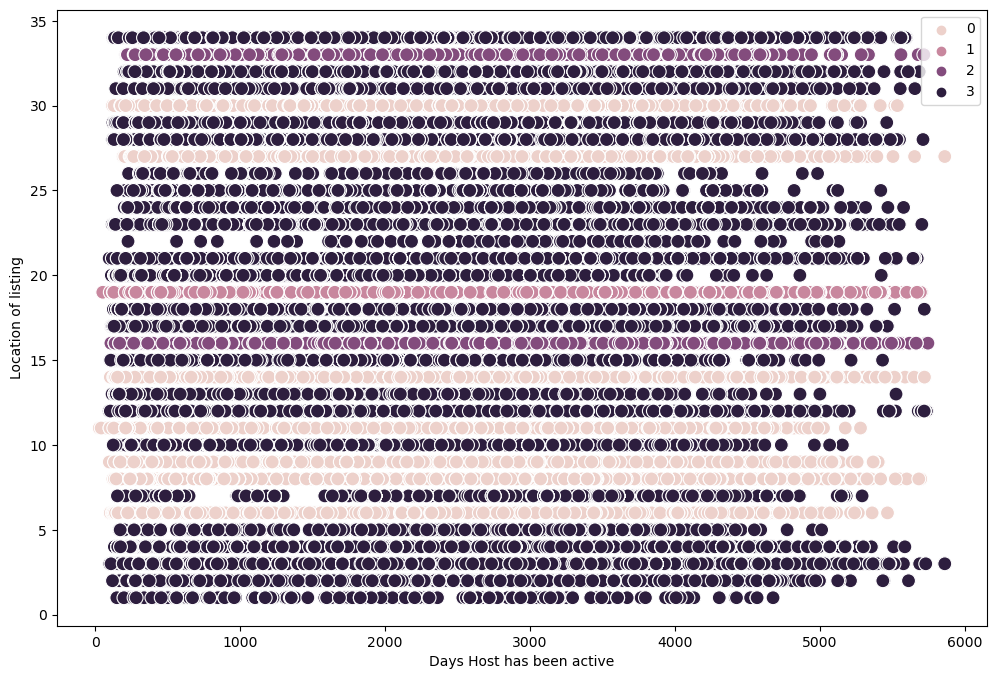

In [31]:
# Plot the clusters for the "days Passed " and "City Code" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['days Passed'], y=df['City Code'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Days Host has been active') # Label x-axis.
plt.ylabel('Location of listing') # Label y-axis.
plt.show()

/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahboller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


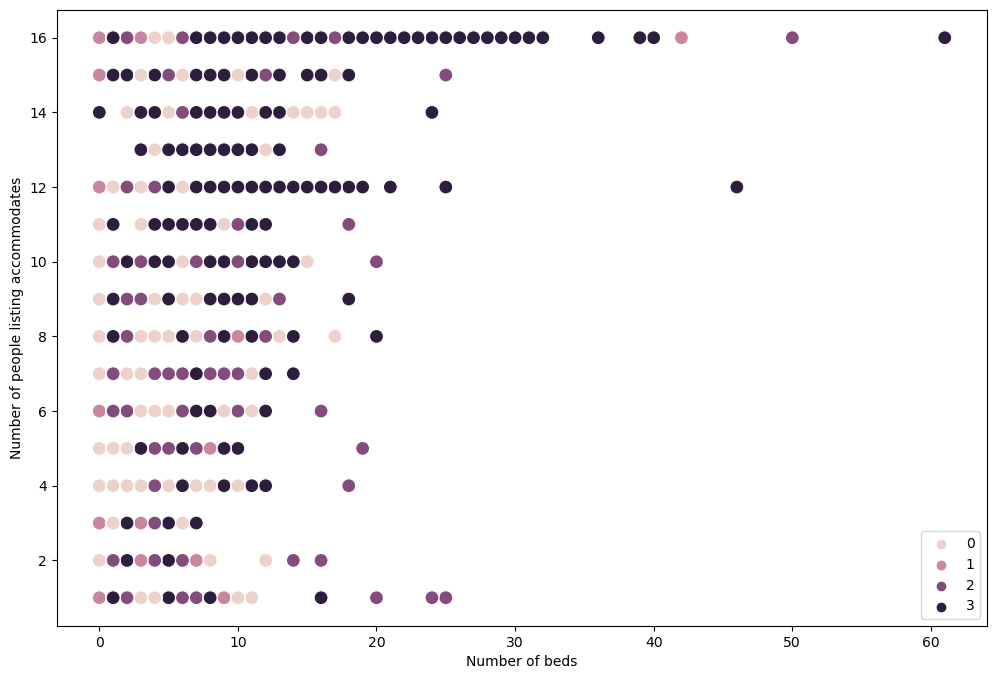

In [32]:
# Plot the clusters for the "Number of beds " and "Accommodates" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['beds'], y=df['accommodates'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of beds') # Label x-axis.
plt.ylabel('Number of people listing accommodates') # Label y-axis.
plt.show()

In [33]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

/var/folders/xq/j07ql7ls565cz8lmytmw14b40000gn/T/ipykernel_58279/648531869.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'


In [34]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median'], 
                         'beds':['mean', 'median'],
                          'accommodates':['mean', 'median'],
                           'days Passed':['mean','median']
                          })

price        review_scores_rating             beds         \
                   mean median                 mean median      mean median   
cluster                                                                       
dark purple  193.843955  136.0             4.798041   4.90  2.619127    2.0   
light pink   272.441730  183.0             4.759007   4.87  2.669676    2.0   
pink         172.005587  125.0             4.716293   4.84  1.721445    1.0   
purple       212.445732  140.0             4.757115   4.90  2.287331    2.0   

            accommodates         days Passed          
                    mean median         mean  median  
cluster                                               
dark purple     4.601035    4.0  2634.457111  2795.0  
light pink      4.854272    4.0  2443.457235  2618.0  
pink            2.995046    2.0  2510.519325  2629.0  
purple          4.135464    4.0  2544.727979  2699.0